**Импорт**

In [42]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
import pathlib
import tensorflow as tf

import cv2
import numpy as np
import time

from PIL import Image

import matplotlib
matplotlib.use("TkAgg")
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

In [2]:
from object_detection.utils import label_map_util
from object_detection.utils import config_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder

In [3]:
tf.get_logger().setLevel('ERROR')

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')

for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

**Обучение через API**

In [6]:
!python3 model_main_tf2.py --model_dir=models/ssd_mobilenet_v2/v1 \
--pipeline_config_path=models/ssd_mobilenet_v2/v1/pipeline.config

2021-03-18 13:28:19.467587: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-03-18 13:28:19.467612: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-03-18 13:28:20.867886: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-03-18 13:28:20.868349: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-03-18 13:28:20.892271: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-03-18 13:28:20.892796: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties

Instructions for updating:
`seed2` arg is deprecated.Use sample_distorted_bounding_box_v2 instead.
W0318 13:28:27.513175 140049373595456 deprecation.py:339] From /home/dmitrii/.local/lib/python3.6/site-packages/tensorflow/python/util/dispatch.py:201: sample_distorted_bounding_box (from tensorflow.python.ops.image_ops_impl) is deprecated and will be removed in a future version.
Instructions for updating:
`seed2` arg is deprecated.Use sample_distorted_bounding_box_v2 instead.
Instructions for updating:
Use `tf.cast` instead.
W0318 13:28:28.407882 140049373595456 deprecation.py:339] From /home/dmitrii/.local/lib/python3.6/site-packages/object_detection/inputs.py:282: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.cast` instead.
2021-03-18 13:28:29.609630: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-03-18 13:28:29

Instructions for updating:
Use fn_output_signature instead
W0318 13:28:38.659011 140036435588864 deprecation.py:537] From /home/dmitrii/.local/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py:605: calling map_fn_v2 (from tensorflow.python.ops.map_fn) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Use fn_output_signature instead
INFO:tensorflow:Step 100 per-step time 0.412s loss=2.211
I0318 13:29:25.114843 140049373595456 model_lib_v2.py:670] Step 100 per-step time 0.412s loss=2.211
INFO:tensorflow:Step 200 per-step time 0.405s loss=1.785
I0318 13:30:06.058646 140049373595456 model_lib_v2.py:670] Step 200 per-step time 0.405s loss=1.785
INFO:tensorflow:Step 300 per-step time 0.414s loss=1.222
I0318 13:30:46.772336 140049373595456 model_lib_v2.py:670] Step 300 per-step time 0.414s loss=1.222
INFO:tensorflow:Step 400 per-step time 0.406s loss=1.771
I0318 13:31:27.423343 140049373595456 model_lib_v2.py:670] Step 400 per-step ti

INFO:tensorflow:Step 4900 per-step time 0.433s loss=0.419
I0318 14:03:19.170982 140049373595456 model_lib_v2.py:670] Step 4900 per-step time 0.433s loss=0.419
INFO:tensorflow:Step 5000 per-step time 0.440s loss=0.691
I0318 14:04:02.571776 140049373595456 model_lib_v2.py:670] Step 5000 per-step time 0.440s loss=0.691


In [8]:
!python3 exporter_main_v2.py \
--input_type image_tensor \
--pipeline_config_path=models/ssd_mobilenet_v2/v1/pipeline.config \
--trained_checkpoint_dir=models/ssd_mobilenet_v2/v1 \
--output_directory=\my_model

2021-03-18 14:12:13.875171: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-03-18 14:12:13.875194: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-03-18 14:12:15.082238: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-03-18 14:12:15.082736: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-03-18 14:12:15.108453: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-03-18 14:12:15.109058: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties

2021-03-18 14:12:29.068600: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
INFO:tensorflow:Unsupported signature for serialization: (([(<tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd7db6013c8>, TensorSpec(shape=(None, 80, 80, 32), dtype=tf.float32, name='image_features/0/1')), (<tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd7db6017f0>, TensorSpec(shape=(None, 40, 40, 96), dtype=tf.float32, name='image_features/1/1')), (<tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd7db6016d8>, TensorSpec(shape=(None, 20, 20, 1280), dtype=tf.float32, name='image_features/2/1'))], False), {}).
I0318 14:12:33.478055 140577266685760 def_function.py:1170] Unsupported signature for serialization: (([(<tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd7db6013c8>, TensorSpec(shape=(None, 80, 80, 32), dtype=tf.float32

W0318 14:12:35.858983 140577266685760 save.py:241] Found untraced functions such as WeightSharedConvolutionalBoxPredictor_layer_call_fn, WeightSharedConvolutionalBoxPredictor_layer_call_and_return_conditional_losses, WeightSharedConvolutionalBoxHead_layer_call_fn, WeightSharedConvolutionalBoxHead_layer_call_and_return_conditional_losses, WeightSharedConvolutionalBoxPredictor_layer_call_fn while saving (showing 5 of 155). These functions will not be directly callable after loading.
INFO:tensorflow:Unsupported signature for serialization: (([(<tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd7db6013c8>, TensorSpec(shape=(None, 80, 80, 32), dtype=tf.float32, name='image_features/0/1')), (<tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd7db6017f0>, TensorSpec(shape=(None, 40, 40, 96), dtype=tf.float32, name='image_features/1/1')), (<tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd7db6016d8>, TensorSpec(shape=(None, 20, 20, 12

W0318 14:12:36.401740 140577266685760 save.py:241] Found untraced functions such as WeightSharedConvolutionalBoxPredictor_layer_call_fn, WeightSharedConvolutionalBoxPredictor_layer_call_and_return_conditional_losses, WeightSharedConvolutionalBoxHead_layer_call_fn, WeightSharedConvolutionalBoxHead_layer_call_and_return_conditional_losses, WeightSharedConvolutionalBoxPredictor_layer_call_fn while saving (showing 5 of 155). These functions will not be directly callable after loading.
INFO:tensorflow:Unsupported signature for serialization: (([(<tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd7db6013c8>, TensorSpec(shape=(None, 80, 80, 32), dtype=tf.float32, name='image_features/0/1')), (<tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd7db6017f0>, TensorSpec(shape=(None, 40, 40, 96), dtype=tf.float32, name='image_features/1/1')), (<tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fd7db6016d8>, TensorSpec(shape=(None, 20, 20, 12

**Inference**

In [62]:
IMAGE_PATHS = "test.jpg"
PATH_TO_MODEL_DIR = "./my_model"
PATH_TO_LABELS = "./data/label_map.pbtxt"

PATH_TO_CFG = PATH_TO_MODEL_DIR + "/pipeline.config"
PATH_TO_CKPT = PATH_TO_MODEL_DIR + "/checkpoint"

In [6]:
PATH_TO_CFG = PATH_TO_MODEL_DIR + "/pipeline.config"
PATH_TO_CKPT = PATH_TO_MODEL_DIR + "/checkpoint"

print('Loading model... ', end='')
start_time = time.time()

# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(PATH_TO_CFG)
model_config = configs['model']
detection_model = model_builder.build(model_config=model_config, is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(PATH_TO_CKPT, 'ckpt-0')).expect_partial()

@tf.function
def detect_fn(image):
    """Detect objects in image."""

    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)

    return detections

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

Loading model... Done! Took 0.04071640968322754 seconds


In [7]:
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

Running inference for test.jpg... Done


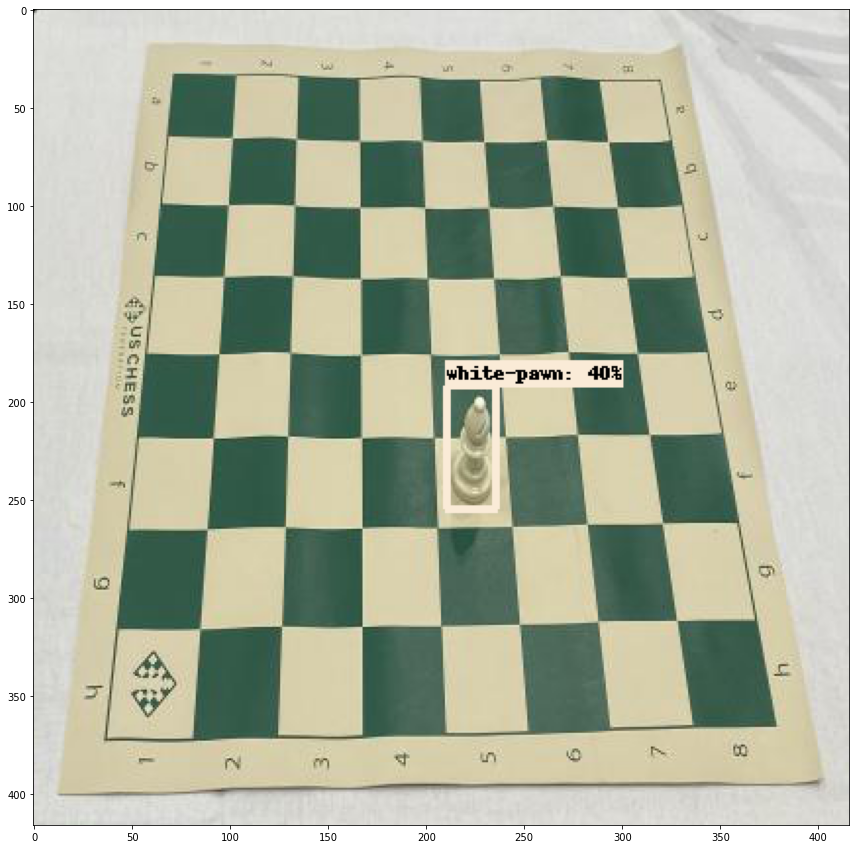

In [71]:
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.

    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.

    Args:
      path: the file path to the image

    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))




print('Running inference for {}... '.format(IMAGE_PATHS), end='')

image_np = load_image_into_numpy_array(IMAGE_PATHS)

# Things to try:
# Flip horizontally
# image_np = np.fliplr(image_np).copy()

# Convert image to grayscale
# image_np = np.tile(
#     np.mean(image_np, 2, keepdims=True), (1, 1, 3)).astype(np.uint8)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)

detections = detect_fn(input_tensor)

# All outputs are batches tensors.
# Convert to numpy arrays, and take index [0] to remove the batch dimension.
# We're only interested in the first num_detections.
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=200,
            min_score_thresh=.30,
            agnostic_mode=False)

plt.figure(figsize=(15, 15))
plt.imshow(image_np_with_detections)
print('Done')
plt.show()

# sphinx_gallery_thumbnail_number = 2